## Twitter Sentiment
First, load the data into the workspace.

In [15]:
import pandas as pd
import psycopg2
import sys
sys.path.append("../listener")

import private

with psycopg2.connect(private.AWS_CONNECTION_STRING) as conn:
    df = pd.read_sql(
        sql = 'select * from twitter_sentiment.dating_apps;',
        con = conn
    )

### Sentiment Analysis
Use the vader package to assign sentiment to each tweet.

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

print('Tinder: ' + str(analyser.polarity_scores("I love Tinder, so much fun!")))
print('Jswipe: ' + str(analyser.polarity_scores("All the best people are on Jswipe")))
print('Bumble: ' + str(analyser.polarity_scores("Are you F&%$ing kidding me??? Bumble is terrible!!!")))

Tinder: {'neg': 0.0, 'neu': 0.271, 'pos': 0.729, 'compound': 0.843}
Jswipe: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
Bumble: {'neg': 0.379, 'neu': 0.504, 'pos': 0.117, 'compound': -0.6269}


In [48]:
df_clean = df[['tweet_created_at','tweet_text','tweet_full_text']][df['tweet_language']=='en']

def get_positive_sentiment(text):
    '''Take text, return positive sentiment score'''
    return analyser.polarity_scores(text)['pos']

def get_negative_sentiment(text):
    '''Take text, return positive sentiment score'''
    return analyser.polarity_scores(text)['neg']

In [51]:
df_clean['sentiment_positive'] = df_clean['tweet_text'].apply(get_positive_sentiment)
df_clean['sentiment_negative'] = df_clean['tweet_text'].apply(get_negative_sentiment)

df_clean.head()

,tweet_created_at,tweet_text,tweet_full_text,sentiment_positive,sentiment_negative
0,2019-01-21 23:00:20,Don't get them guys who put their gender as gi...,None,0.000,0.000
1,2019-01-21 23:04:23,UHMMMM. i made a tinder again and found the gu...,UHMMMM. i made a tinder again and found the gu...,0.249,0.061
4,2019-01-21 23:04:29,RT @AzakFeverAFC49: Love tinder. Been on it no...,None,0.201,0.179
14,2019-01-21 23:04:49,RT @KellyJoBluen: On the tinder date in the co...,None,0.000,0.000
15,2019-01-21 23:04:52,"RT @BenJolly9: Worryingly, Theresa May is plan...",None,0.000,0.125


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca7b650>,
      dtype=object)

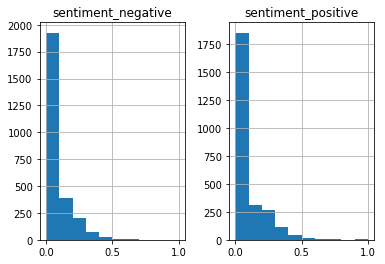

In [58]:
df_clean.hist()